In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install open3d


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


# 2d into 3d with **background**

Enter the path to the image: /content/drive/MyDrive/ml_task/apple.jpg
1/1 [==============================] - 1s 1s/step
1: Granny_Smith (0.71)
2: pomegranate (0.06)
3: orange (0.03)
4: croquet_ball (0.02)
5: strawberry (0.02)
6: banana (0.01)
1/1 [==============================] - 1s 1s/step
Object Classification: Granny_Smith
Object Classification: Granny_Smith
Dimensions:
Estimated Dimensions (Width, Height) for /content/drive/MyDrive/ml_task/apple.jpg: Width= 599, Height= 552
Image Size 28904 bytes
Actual Weight: 0.07274256 kg


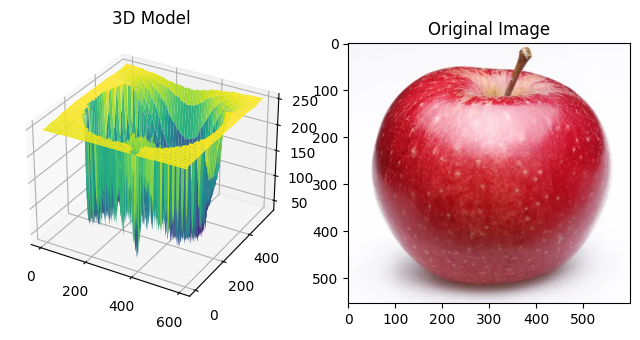

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import open3d as o3d
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
# Load pre-trained ResNet50 model for image classification
classification_model = tf.keras.applications.ResNet50(weights='imagenet')

# Get user input for the image path
img_path = input("Enter the path to the image: ")


model = tf.keras.applications.ResNet50(weights='imagenet')

# Load and preprocess the input image
# img_path = '/content/drive/MyDrive/ml_task/phone.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=6)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Load and preprocess the input image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = tf.expand_dims(img_array, 0)

# Make predictions for image classification
classification_predictions = classification_model.predict(img_array)
decoded_classification = decode_predictions(classification_predictions, top=1)[0]
top_classification_label = decoded_classification[0][1]

print(f"Object Classification: {top_classification_label}")



# Placeholder for actual weight calculation
def calculate_actual_weight(volume, density):
    # Assuming density is in grams per cubic unit, the weight will be in grams
    weight_grams = volume * density
    return weight_grams

# Get top predicted class
top_classification_label = decoded_predictions[0][1]
print(f"Object Classification: {top_classification_label}")

# Assign density based on predicted class
if "Water" in top_classification_label:
    density_of_object = 1.0  # g/cm³ or 1000 kg/m³
elif "Wood" in top_classification_label:
    density_of_object = 0.6  # Example density value for wood, you can adjust
elif "Steel" in top_classification_label:
    density_of_object = 7.85
elif "Aluminum" in top_classification_label:
    density_of_object = 2.7
elif "Polyethylene" in top_classification_label:  # Assuming plastic
    density_of_object = 0.92
elif "Air" in top_classification_label:
    density_of_object = 0.0  # Negligible for most practical purposes
else:
    # Default density value if no specific match
    density_of_object = 0.001  # Replace with your default value

# Initialize dimensions for the first image
previous_dimensions = None

# Load the image
image = cv2.imread(img_path)

# Check if the image is loaded successfully
if image is None:
    print(f"Error: Unable to load the image {img_path}")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use the depth information to create a 3D model
    height, width = gray.shape
    x, y = np.meshgrid(range(width), range(height))
    z = gray

    # Calculate dimensions based on image pixel coordinates
    x_size = np.max(x) - np.min(x)
    y_size = np.max(y) - np.min(y)
    z_size = np.max(z) - np.min(z)

    # Get file size (in bytes)
    file_size = os.path.getsize(img_path)

    # Display dimensions and weight
    print("Dimensions:")
    print(f"Estimated Dimensions (Width, Height) for {img_path}: Width= {x_size}, Height= {y_size}")
    print(f"Image Size {file_size} bytes")



    # Calculate volume based on dimensions
    volume = x_size * y_size * z_size

    # Calculate actual weight in grams
    actual_weight_grams = calculate_actual_weight(volume, density_of_object)
    actual_weight= actual_weight_grams/1000000
    print(f"Actual Weight: {actual_weight} kg")

    # Create a 3D plot
    fig = plt.figure(figsize=(8, 5))

    # Plot the 3D model
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(x, y, z, cmap='viridis')
    ax1.set_title('3D Model')

    # Display the original 2D image
    ax2 = fig.add_subplot(122)
    ax2.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax2.set_title('Original Image')

    # Show the plot
    plt.show()

    # Calculate accuracy (skip for the first image since there is no previous image)
    if previous_dimensions is not None:
        current_dimensions = (x_size, y_size)
        accuracy = calculate_accuracy(previous_dimensions, current_dimensions)
        print(f"Accuracy for {img_path}: {accuracy}%")

    # Update previous dimensions for the next iteration
    previous_dimensions = (x_size, y_size)







without ***background***

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load pre-trained ResNet50 model for image classification
classification_model = tf.keras.applications.ResNet50(weights='imagenet')

# Placeholder for actual weight calculation
def calculate_actual_weight(volume, density):
    # Assuming density is in grams per cubic unit, the weight will be in grams
    weight_grams = volume * density
    return weight_grams

# Placeholder for known or assumed values
density_of_object = 0.001  # Replace with the density of the object material in your case (grams per cubic unit)

# Function to remove background using a simple thresholding technique
def remove_background(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(image, image, mask=thresh)
    return result

# Function to load image from URL
def load_image_from_url(url):
    response = requests.get(url)
    img = image.load_img(BytesIO(response.content), target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

# Get user input for the image path or URL
user_input = input("Enter the path to the image or URL: ")

# Check if the input is a URL or a local path
if user_input.startswith("http"):
    # Load image from URL
    img_array = load_image_from_url(user_input)
else:
    # Remove background and load image for classification
    img_path = user_input
    image_no_bg = remove_background(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)

# Expand dimensions for model input
img_array = tf.expand_dims(img_array, 0)

# Make predictions for image classification
classification_predictions = classification_model.predict(img_array)
decoded_predictions = decode_predictions(classification_predictions, top=5)[0]

print("Top Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# If local image, proceed with further processing
if not user_input.startswith("http"):
    # Get top predicted class
    top_classification_label = decoded_predictions[0][1]

    print(f"Object Classification: {top_classification_label}")

    # Initialize dimensions for the processed image
    previous_dimensions = None

    # Convert the processed image to grayscale
    gray_no_bg = cv2.cvtColor(image_no_bg, cv2.COLOR_BGR2GRAY)

    # Use the depth information to create a 3D model
    height, width = gray_no_bg.shape
    x, y = np.meshgrid(range(width), range(height))
    z = gray_no_bg

    # Calculate dimensions based on image pixel coordinates
    x_size = np.max(x) - np.min(x)
    y_size = np.max(y) - np.min(y)
    z_size = np.max(z) - np.min(z)

    # Display dimensions and weight
    print("Dimensions after removing background:")
    print(f"Estimated Dimensions (Width, Height) for {img_path}: Width= {x_size}, Height= {y_size}")

    # Calculate volume based on dimensions
    volume = x_size * y_size * z_size

    # Calculate actual weight in grams
    actual_weight_grams = calculate_actual_weight(volume, density_of_object)
    actual_weight = actual_weight_grams / 1000000  # Convert to kilograms
    print(f"Actual Weight: {actual_weight} kg")

    # Create a 3D plot
    fig = plt.figure(figsize=(8, 5))

    # Plot the 3D model
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(x, y, z, cmap='viridis')
    ax1.set_title('3D Model after removing background')

    # Display the original 2D image
    ax2 = fig.add_subplot(122)
    ax2.imshow(cv2.cvtColor(image_no_bg, cv2.COLOR_BGR2RGB))
    ax2.set_title('Processed Image without Background')

    # Show the plot
    plt.show()


Enter the path to the image or URL: https://imgs.search.brave.com/bmGINUnXLPpHJDvdlbfDn3ly0MZ6TKedkYicTiJNDIU/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvMTU3/NjQ0MzI1L3Bob3Rv/L3dhdGVyLWRyb3Au/anBnP3M9NjEyeDYx/MiZ3PTAmaz0yMCZj/PU84a2hyN293ZFJB/bnRSUksyUjQyYTRU/REd4QnNiM0oxX2pO/YlNHeUJtVzg9
1/1 [==============================] - 1s 1s/step
Top Predictions:
1: platypus (0.71)
2: water_bottle (0.11)
3: goblet (0.03)
4: washbasin (0.02)
5: bubble (0.02)
